<a href="https://colab.research.google.com/github/dayudyah20/Coba/blob/main/Grafik_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model pada Orang Normal**

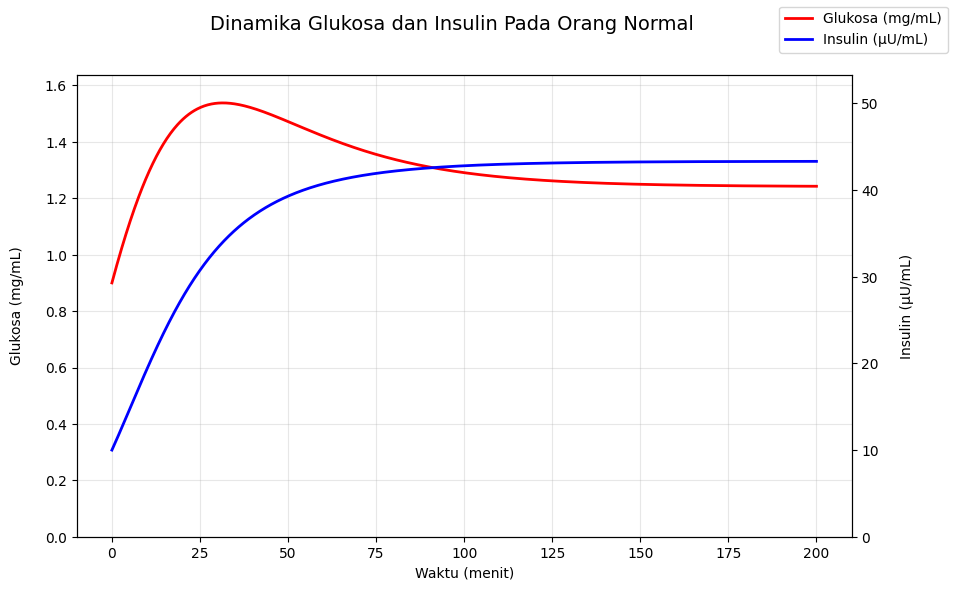

In [1]:

import numpy as np
import matplotlib.pyplot as plt


# Definisi fungsi untuk sistem persamaan
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    return np.array([dGdt, dIdt])


# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z


# Parameter-parameter
alpha = 6    # Penerimaan glukosa
gamma = 0.005 # Penggunaan glukosa tanpa insulin
theta = 0.001 # Pengaruh insulin pada glukosa
delta = 0.013  # Sekresi insulin dari glukosa
beta = 0.0003  # Clearance insulin


# Waktu simulasi
t = np.linspace(0, 200, 1000)


# Kondisi awal [Glukosa (G), Insulin (I)]
z0 = [90, 10]


params = (alpha, gamma, theta, delta, beta)
z_adjusted_slightly_higher_glucose = runge_kutta_4(f, z0, t, params)

# Ekstrak Glukosa dan Insulin
glucose = z_adjusted_slightly_higher_glucose[:, 0]  # Ambil nilai glukosa
insulin = z_adjusted_slightly_higher_glucose[:, 1]  # Ambil nilai insulin

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

In [2]:
# Menghitung titik kesetimbangan berdasarkan formula yang diberikan
G_eq = alpha * beta / (beta * gamma + delta * theta)
I_eq = delta / beta

# Menghitung nilai eigen berdasarkan formula yang diberikan
lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
lambda_2 = -(alpha * beta**2) / (beta * gamma + delta * theta)

# Menampilkan titik kesetimbangan dan nilai eigen
print(f"Titik Kesetimbangan: G = {G_eq:.2f}, I = {I_eq:.2f}")
print(f"Nilai Eigen: \u03bb_1 = {lambda_1:.2f}, \u03bb_2 = {lambda_2:.2f}")

Titik Kesetimbangan: G = 124.14, I = 43.33
Nilai Eigen: λ_1 = -0.05, λ_2 = -0.04


# **MODEL PADA DM1 TK1 = 0**

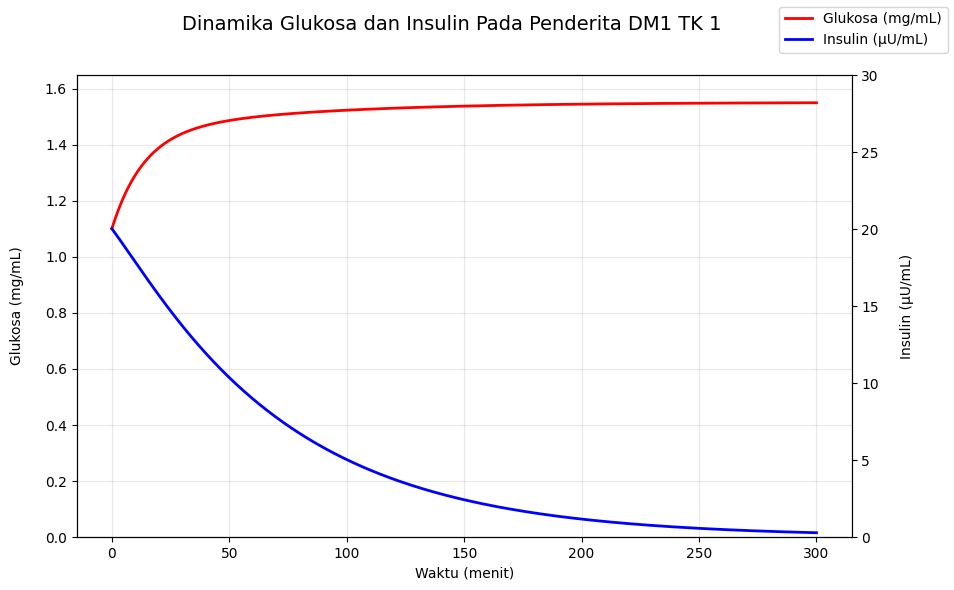

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter-parameter
alpha = 10.7  # Penerimaan glukosa
gamma = 0.069 # Penggunaan glukosa
theta = 0.0002  # Pengaruh insulin
sigma = 0.0006  # Efektivitas insulin
epsilon = 0.001  # Tingkat kejenuhan
beta = 0.0001  # Laju clearance insulin

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Kondisi awal
z0 = np.array([110.0, 20.0])  # Glukosa mulai dari 110 mg/dL, Insulin mulai dari 20 μU/ml

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)  # Hingga 200 menit

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Penderita DM1 TK 1', fontsize=14)
ax1.grid(alpha=0.3)

In [ ]:
# Titik Kritis 1
G_kritis = alpha / gamma
I_kritis = 0  # Insulin pada titik kritis adalah 0

# Menampilkan titik kritis pertama
print("Titik Kritis 1:")
print("G (Glukosa) =", G_kritis)
print("I (Insulin) =", I_kritis)

# Hitung Nilai Eigen
lambda_1 = -gamma
lambda_2 = (sigma * gamma - beta * alpha) / gamma

print("\nNilai Eigen 1 (λ_1):", lambda_1)
print("Nilai Eigen 2 (λ_2):", lambda_2)

Titik Kritis 1:
G (Glukosa) = 155.0724637681159
I (Insulin) = 0

Nilai Eigen 1 (λ_1): -0.069
Nilai Eigen 2 (λ_2): -0.014907246376811593


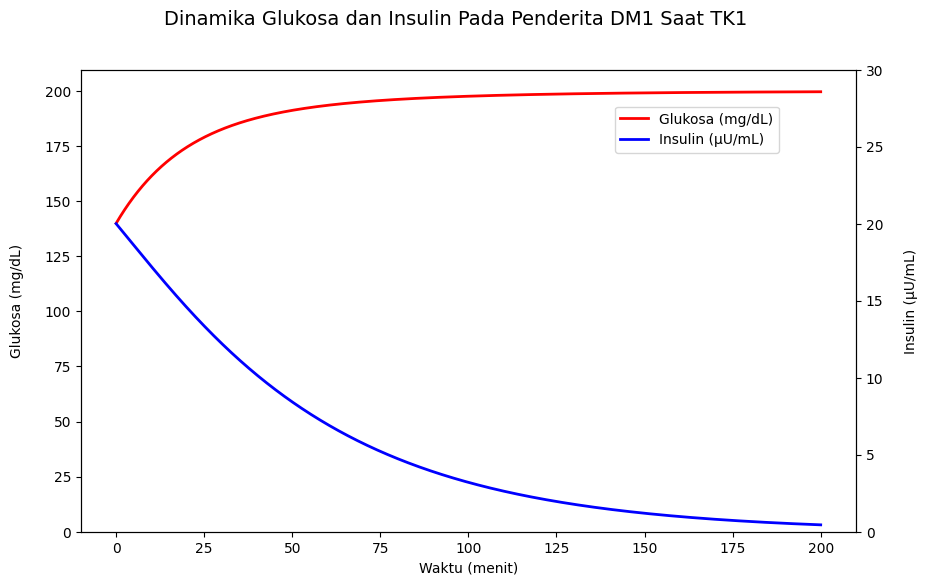

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Parameter-parameter
alpha = 10  # Penerimaan glukosa
gamma = 0.05  #Penggunaan glukosa tanpa keterlibatan insulin
theta = 0.0001  #Penggunaan glukosa tergantung pada insulin
sigma = 0.0002  # Efektivitas insulin
epsilon = 0.002  # Tingkat kejenuhan
beta = 0.0001  # Laju clearance insulin


# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin
    return np.array([dGdt, dIdt])


# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z


# Kondisi awal
z0 = np.array([140.0, 20.0])


# Rentang waktu simulasi
t = np.linspace(0, 200, 2000)


# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)


# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]


# Plot gabungan dengan dua sumbu y (Glukosa di kiri, Insulin di kanan)
fig, ax1 = plt.subplots(figsize=(10, 6))


# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/dL)', color='black', labelpad=15)
ax1.plot(t, glucose, label='Glukosa (mg/dL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose) + 10)


# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 30)
ax2.set_yticks(range(0, 31, 5))


# Tambahkan garis vertikal di sumbu Y kanan
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('black')


# Tambahkan legenda
fig.legend(loc="upper right", bbox_to_anchor=(0.83, 0.83))


# Tambahkan judul
fig.suptitle('Dinamika Glukosa dan Insulin Pada Penderita DM1 Saat TK1', fontsize=14)


plt.show()

In [ ]:
# Titik Kritis 1
G_kritis = alpha / gamma
I_kritis = 0  # Insulin pada titik kritis adalah 0

# Menampilkan titik kritis pertama
print("Titik Kritis 1:")
print("G (Glukosa) =", G_kritis)
print("I (Insulin) =", I_kritis)

# Hitung Nilai Eigen
lambda_1 = -gamma
lambda_2 = (sigma * gamma - beta * alpha) / gamma

print("\nNilai Eigen 1 (λ_1):", lambda_1)
print("Nilai Eigen 2 (λ_2):", lambda_2)

Titik Kritis 1:
G (Glukosa) = 200.0
I (Insulin) = 0

Nilai Eigen 1 (λ_1): -0.05
Nilai Eigen 2 (λ_2): -0.019799999999999998


MODEL DM1 INJEKSI INSULIN

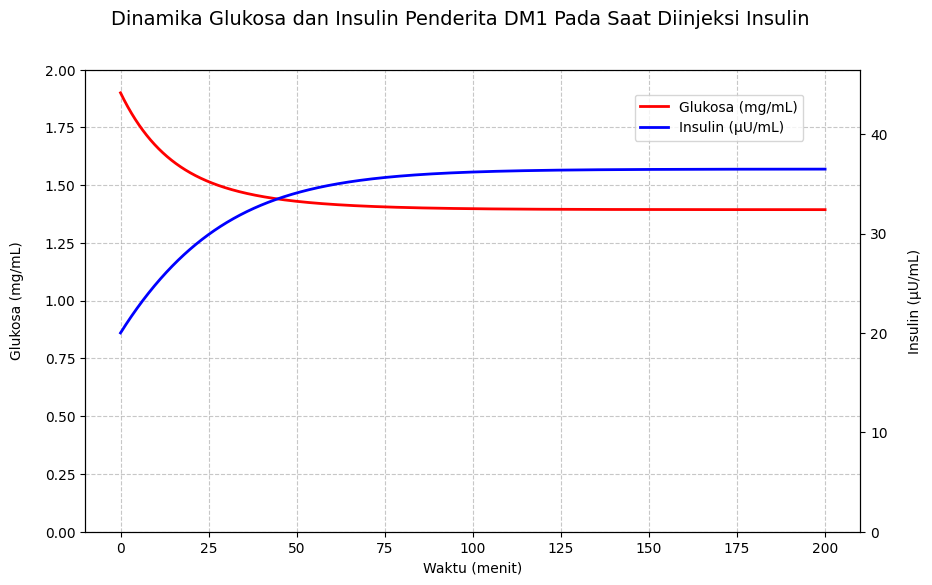

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/mL/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-Parameter
alpha = 13 # Penerimaan glukosa
gamma = 0.075    # Penggunaan glukosa tanpa keterlibatan insulin
theta = 0.0005 # Penggunaan glukosa tergantung pada insulin
sigma = 1.85       # Efektivitas atau efisiensi dari insulin yang diberikan melalui injeksi insulin
beta = 0.0005   # Laju clearance insulin
epsilon = 0.7   # Tingkat kejenuhan dalam respon insulin terhadap glukosa

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)

# Kondisi awal
z0 = np.array([190.0, 20.0])  # Glukosa (mg/dL) dan Insulin (μU/mL)

# Simulasi
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL
glucose_converted = glucose / 100

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)

# Tambahkan grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan garis vertikal di sumbu Y kanan
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('black')

# Tambahkan legenda
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# Tambahkan judul
fig.suptitle('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)

plt.show()

In [ ]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 139.42307692307693
I (Insulin) = 36.48275862068966
Nilai Lambda 1 (λ₁): -0.08016164930317198
Nilai Lambda 2 (λ₂): -0.08016440436348186


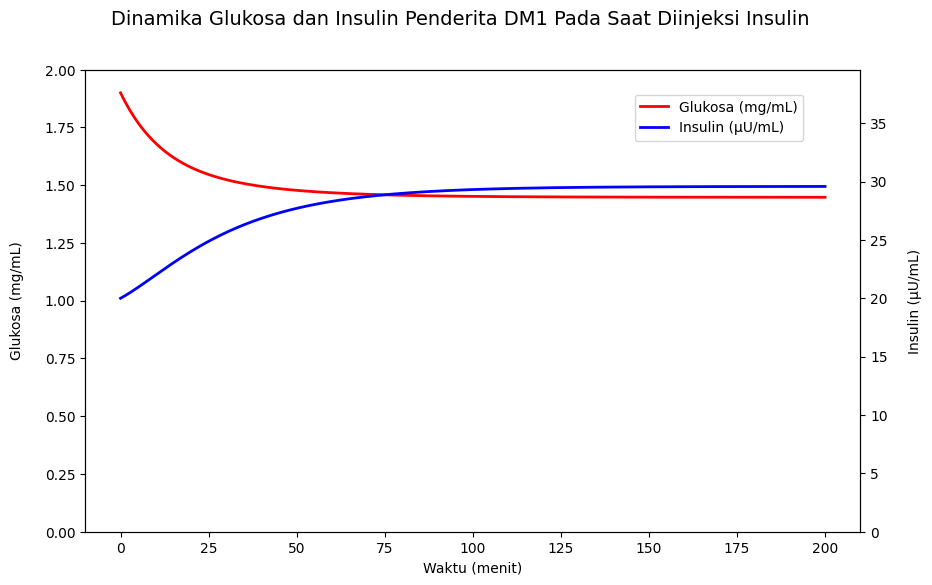

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G  # Perubahan kadar insulin (μU/mL/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 untuk menyelesaikan sistem persamaan diferensial
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-Parameter
alpha = 13      #Penerimaan glukosa
gamma = 0.075   #Penggunaan glukosa tanpa keterlibatan insulin
theta = 0.0005  #Penggunaan glukosa tergantung pada insulin
sigma = 1.6     #Efektivitas atau efisiensi dari insulin yang diberikan melalui injeksi insulin
beta = 0.0004   #Laju clearance insulin
epsilon = 0.9   #Tingkat kejenuhan dalam respon insulin terhadap glukosa

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)

# Kondisi awal
z0 = np.array([190.0, 20.0])  # Glukosa (mg/dL) dan Insulin (μU/mL)

# Simulasi
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan garis vertikal di sumbu Y kanan
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('black')

# Tambahkan legenda
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# Tambahkan judul
fig.suptitle('Dinamika Glukosa dan Insulin Penderita DM1 Pada Saat Diinjeksi Insulin', fontsize=14)

plt.show()

In [ ]:
import math

G_kritis_2 = (alpha * beta * epsilon - theta * sigma) / (beta * (gamma * epsilon - theta))
I_kritis_2 = (-alpha * beta + gamma * sigma) / (alpha * beta * epsilon - theta * sigma)

# Menampilkan Titik Kritis Kedua
print("Titik Kritis 2:")
print("G (Glukosa) =", G_kritis_2)
print("I (Insulin) =", I_kritis_2)

# Rumus bagian dalam akar kuadrat
term_inside_sqrt = (gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
                    theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
                    (alpha * beta * epsilon - theta * sigma) ** 3 +
                    sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta))

# Menghitung λ₁
lambda_1 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) + \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menghitung λ₂
lambda_2 = -((gamma * sigma * (alpha * beta * epsilon - theta * sigma) * (epsilon * gamma - theta) ** 2 +
              theta * sigma * (-alpha * beta + gamma * sigma) * (epsilon * gamma - theta) ** 2 -
              (alpha * beta * epsilon - theta * sigma) ** 3 +
              sigma * (alpha * beta * epsilon - theta * sigma) ** 2 * (epsilon * gamma - theta)) /
             (2 * sigma * (epsilon * gamma - theta) ** 2 * (alpha * beta * epsilon - sigma * theta))) - \
           math.sqrt((term_inside_sqrt) ** 2 -
                     4 * sigma * (alpha * beta * epsilon - theta * sigma) ** 3 * (epsilon * gamma - theta) ** 3 * (-alpha * beta + gamma * sigma))

# Menampilkan hasil
print("Nilai Lambda 1 (λ₁):", lambda_1)
print("Nilai Lambda 2 (λ₂):", lambda_2)

Titik Kritis 2:
G (Glukosa) = 144.7761194029851
I (Insulin) = 29.587628865979372
Nilai Lambda 1 (λ₁): -0.07280223859140554
Nilai Lambda 2 (λ₂): -0.07280601112783945


MODEL MENGGGUNAKAN NILAI DARI **JURNAL**

ORANG NORMAL

<ipython-input-13-b36fc30154e9>:7: RuntimeWarning: overflow encountered in scalar multiply
  dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
<ipython-input-13-b36fc30154e9>:8: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
<ipython-input-13-b36fc30154e9>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan


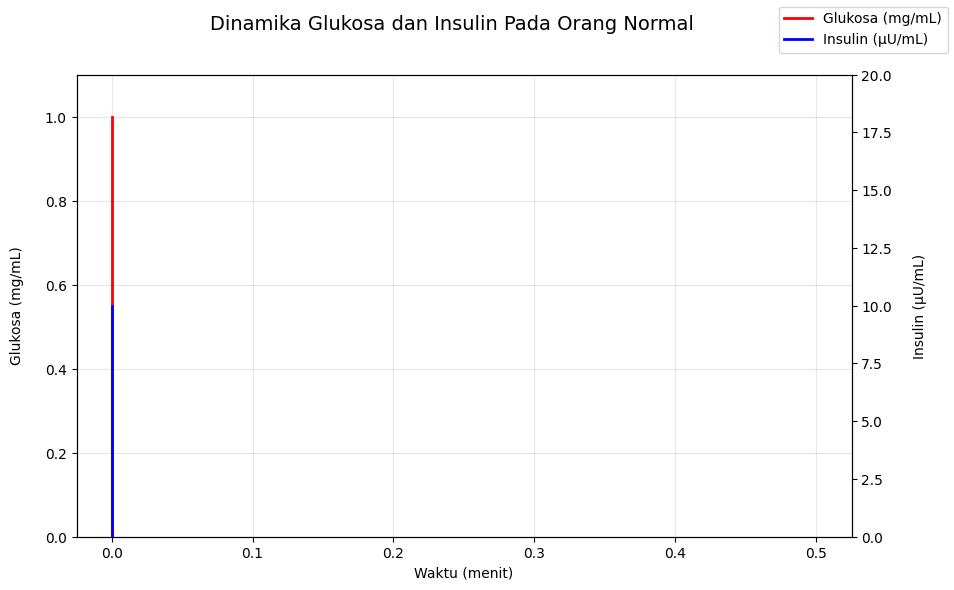

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi fungsi untuk sistem persamaan
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-parameter
alpha = 4.5    # Penerimaan glukosa
gamma = 0.0002 # Penggunaan glukosa tanpa insulin
theta = 0.00075919 # Pengaruh insulin pada glukosa
delta = 0.2298 # Sekresi insulin dari glukosa
beta = 1500  # Clearance insulin

# Waktu simulasi
t = np.linspace(0, 500, 1000)

# Kondisi awal [Glukosa (G), Insulin (I)]
z0 = [100, 10]

# Simulasi dengan parameter baru
params = (alpha, gamma, theta, delta, beta)
z_adjusted_slightly_higher_glucose = runge_kutta_4(f, z0, t, params)

# Ekstrak Glukosa dan Insulin
glucose = z_adjusted_slightly_higher_glucose[:, 0]  # Ambil nilai glukosa
insulin = z_adjusted_slightly_higher_glucose[:, 1]  # Ambil nilai insulin

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)

# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

DM1

<ipython-input-17-cad17266e1d5>:10: RuntimeWarning: overflow encountered in scalar multiply
  dGdt = alpha - gamma * G - theta * G * I
<ipython-input-17-cad17266e1d5>:12: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = (sigma * I / (1 + epsilon * I)) - beta * I * G
<ipython-input-17-cad17266e1d5>:10: RuntimeWarning: invalid value encountered in scalar subtract
  dGdt = alpha - gamma * G - theta * G * I
<ipython-input-17-cad17266e1d5>:12: RuntimeWarning: invalid value encountered in scalar divide
  dIdt = (sigma * I / (1 + epsilon * I)) - beta * I * G


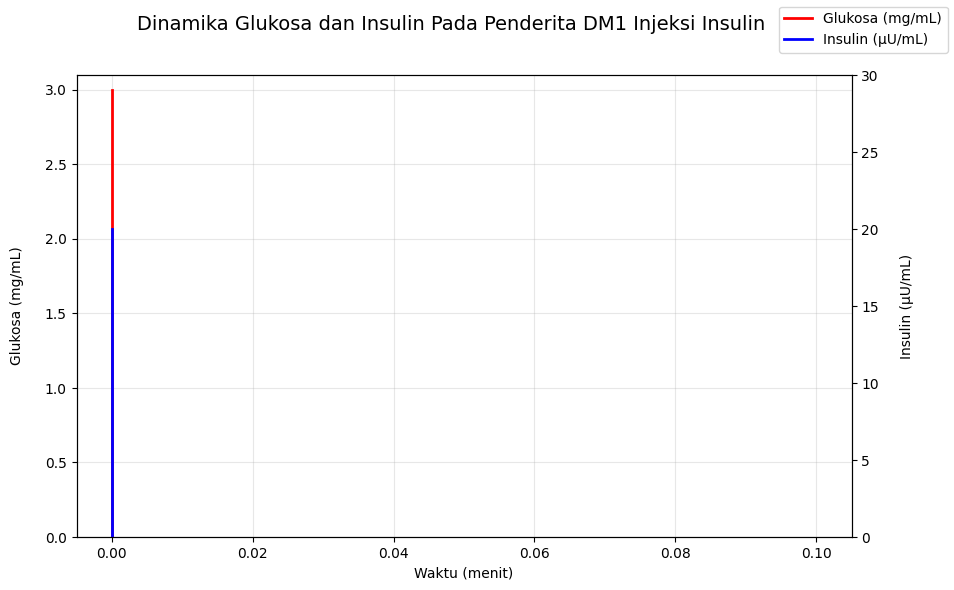

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    # Perubahan kadar glukosa (mg/dL/min)
    dGdt = alpha - gamma * G - theta * G * I
    # Perubahan kadar insulin (μU/ml/min)
    dIdt = (sigma * I / (1 + epsilon * I)) - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi untuk metode Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5*h*k1, t[i-1] + 0.5*h, *params)
        k3 = f(z[i-1] + 0.5*h*k2, t[i-1] + 0.5*h, *params)
        k4 = f(z[i-1] + h*k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return z

# Parameter-parameter
alpha = 4.5  # Penerimaan glukosa
gamma = 0.0002  # Penggunaan glukosa
theta = 0.00075919 # Pengaruh insulin
sigma = 0.2298  # Efektivitas insulin
epsilon = 2300 # Tingkat kejenuhan
beta = 1500  # Laju clearance insulin
# Kondisi awal
z0 = np.array([300.0, 20.0])  # Glukosa mulai dari 110 mg/dL, Insulin mulai dari 20 μU/ml

# Rentang waktu simulasi
t = np.linspace(0, 300, 3000)  # Hingga 200 menit

# Simulasi numerik
params = (alpha, gamma, theta, sigma, beta, epsilon)
solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

# Pisahkan hasil untuk glukosa dan insulin
glucose = solution[:, 0]
insulin = solution[:, 1]

# Konversi glukosa dari mg/dL ke mg/mL (membagi dengan 100)
glucose_converted = glucose / 100  # Mengubah mg/dL ke mg/mL

# Plot gabungan dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Sumbu Y kiri untuk Glukosa
ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black', labelpad=15)
ax1.plot(t, glucose_converted, label='Glukosa (mg/mL)', color='red', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(glucose_converted) + 0.1)  # Mengatur batas atas sesuai dengan nilai glukosa

# Sumbu Y kanan untuk Insulin
ax2 = ax1.twinx()
ax2.set_ylabel('Insulin (μU/mL)', color='black', labelpad=15)
ax2.plot(t, insulin, label='Insulin (μU/mL)', color='blue', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(insulin) + 10)


# Tambahkan legenda
fig.legend(loc='upper right', fontsize=10)

# Judul dan grid
fig.suptitle('Dinamika Glukosa dan Insulin Pada Penderita DM1 Injeksi Insulin', fontsize=14)
ax1.grid(alpha=0.3)

plt.show()

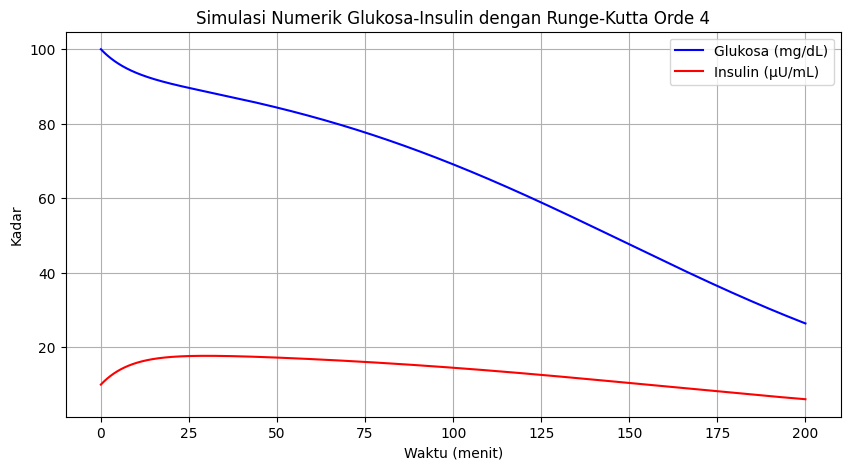

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

# Parameter model
p1 = 0.02  # Laju penggunaan glukosa
p2 = 0.001 # Efek insulin terhadap glukosa
p3 = 0.1   # Laju degradasi insulin
p4 = 0.02  # Produksi insulin oleh glukosa

# Fungsi model diferensial
def dG_dt(G, I):
    return -p1 * G + p2 * G * I

def dI_dt(G, I):
    return -p3 * I + p4 * G

# Metode Runge-Kutta Orde 4 (RK4)
def runge_kutta(G0, I0, t_max, dt):
    t = np.linspace(0, t_max, int(t_max / dt))  # Array waktu
    G = np.zeros_like(t)  # Array untuk glukosa
    I = np.zeros_like(t)  # Array untuk insulin

    G[0] = G0
    I[0] = I0

    for n in range(len(t) - 1):
        # RK4 untuk G
        k1_G = dG_dt(G[n], I[n]) * dt
        k2_G = dG_dt(G[n] + k1_G/2, I[n]) * dt
        k3_G = dG_dt(G[n] + k2_G/2, I[n]) * dt
        k4_G = dG_dt(G[n] + k3_G, I[n]) * dt
        G[n+1] = G[n] + (k1_G + 2*k2_G + 2*k3_G + k4_G) / 6

        # RK4 untuk I
        k1_I = dI_dt(G[n], I[n]) * dt
        k2_I = dI_dt(G[n], I[n] + k1_I/2) * dt
        k3_I = dI_dt(G[n], I[n] + k2_I/2) * dt
        k4_I = dI_dt(G[n], I[n] + k3_I) * dt
        I[n+1] = I[n] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6

    return t, G, I

# Parameter awal dan simulasi
t_max = 200  # Waktu simulasi dalam menit
dt = 0.01    # Langkah waktu kecil untuk stabilitas
G0 = 100     # Kadar glukosa awal (mg/dL)
I0 = 10      # Kadar insulin awal (µU/mL)

# Jalankan simulasi
t, G, I = runge_kutta(G0, I0, t_max, dt)

# Plot hasil simulasi numerik dengan RK4
plt.figure(figsize=(10, 5))
plt.plot(t, G, label="Glukosa (mg/dL)", color="b")
plt.plot(t, I, label="Insulin (µU/mL)", color="r")
plt.xlabel("Waktu (menit)")
plt.ylabel("Kadar")
plt.title("Simulasi Numerik Glukosa-Insulin dengan Runge-Kutta Orde 4")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

# Parameter model
p1 = 0.02  # Laju penggunaan glukosa
p2 = 0.001 # Efek insulin terhadap glukosa
p3 = 0.1   # Laju degradasi insulin
p4 = 0.02  # Produksi insulin oleh glukosa

# Fungsi model diferensial
def dG_dt(G, I):
    return -p1 * G + p2 * G * I

def dI_dt(G, I):
    return -p3 * I + p4 * G

# Metode Runge-Kutta Orde 4 (RK4)
def runge_kutta(G0, I0, t_max, dt):
    t = np.linspace(0, t_max, int(t_max / dt))  # Array waktu
    G = np.zeros_like(t)  # Array untuk glukosa
    I = np.zeros_like(t)  # Array untuk insulin

    G[0] = G0
    I[0] = I0

    for n in range(len(t) - 1):
        # RK4 untuk G
        k1_G = dG_dt(G[n], I[n]) * dt
        k2_G = dG_dt(G[n] + k1_G/2, I[n]) * dt
        k3_G = dG_dt(G[n] + k2_G/2, I[n]) * dt
        k4_G = dG_dt(G[n] + k3_G, I[n]) * dt
        G[n+1] = G[n] + (k1_G + 2*k2_G + 2*k3_G + k4_G) / 6

        # RK4 untuk I
        k1_I = dI_dt(G[n], I[n]) * dt
        k2_I = dI_dt(G[n], I[n] + k1_I/2) * dt
        k3_I = dI_dt(G[n], I[n] + k2_I/2) * dt
        k4_I = dI_dt(G[n], I[n] + k3_I) * dt
        I[n+1] = I[n] + (k1_I + 2*k2_I + 2*k3_I + k4_I) / 6

    return t, G, I

# Parameter awal dan simulasi
t_max = 200  # Waktu simulasi dalam menit
dt = 0.01    # Langkah waktu kecil untuk stabilitas
G0 = 100     # Kadar glukosa awal (mg/dL)
I0 = 10      # Kadar insulin awal (µU/mL)

# Jalankan simulasi
t, G, I = runge_kutta(G0, I0, t_max, dt)

# Plot hasil simulasi numerik dengan RK4
plt.figure(figsize=(10, 5))
plt.plot(t, G, label="Glukosa (mg/dL)", color="b")
plt.plot(t, I, label="Insulin (µU/mL)", color="r")
plt.xlabel("Waktu (menit)")
plt.ylabel("Kadar")
plt.title("Simulasi Numerik Glukosa-Insulin dengan Runge-Kutta Orde 4")
plt.legend()
plt.grid()
plt.show()